In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


file1 = pd.read_excel(r'c:\Users\Andrea C\Desktop\its\Py\datascience\roba_es_preprocess\dataset_clustering_outlier_esercizio.xlsx')

file1.head()
file1.describe()



,X,Y
count,210,210
unique,1,1
top,Altezza_cm,Peso_kg
freq,210,210


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

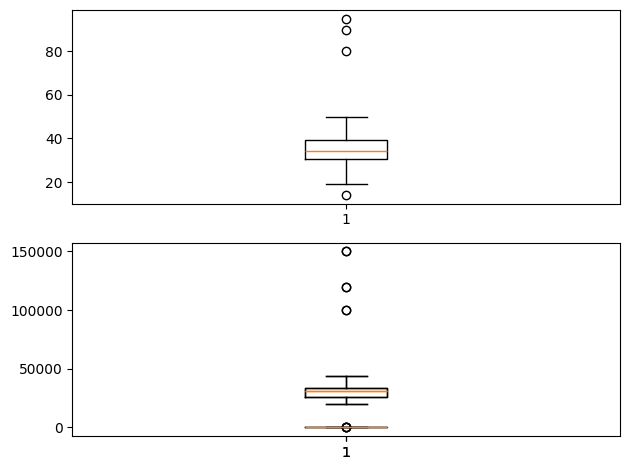

In [47]:
import numpy as np


file2 = pd.read_excel(r'c:\Users\Andrea C\Desktop\its\Py\datascience\roba_es_preprocess\dataset_outlier_iqr_zscore.xlsx')

file2.head()

fig, ax = plt.subplots(2)

ax[0].boxplot(file2['Eta'])
ax[1].boxplot(file2['Reddito'])

bx1 = plt.boxplot(file2['Reddito'])
bx2 = plt.boxplot(file2['Eta'])

plt.tight_layout()  

q1_reddit = file2['Reddito'].quantile(file2,25)
q3_reddit = file2['Reddito'].quantile(file2,75)
iqr = q3_reddit-q1_reddit
print(f"Q1 reddit : {q1_reddit}, Q3 reddit : {q3_reddit}")

Numero di Outliers (K-mean) :  11
Distanze :  [ 7.97756037  2.31001461  4.44764735  9.38924129  1.08676591  1.85779669
 12.66023599  4.65921822  1.90978389  3.53427808  9.91992181  1.59097014
  1.98609581 14.9659872   7.93689904  2.41817905  4.30688149  6.48743084
  6.6731415   7.22265231  8.92789223  4.7654807   6.89880905  9.61090637
  3.35287855 10.82878017  7.1704394   4.0320823   2.24838896  2.80741227
  8.26637765 10.03630355  5.56187978  5.00585035  6.85150532  9.23736724
  4.50483713  9.20521038  7.02412982  6.59821478  4.56250739  6.53709205
  8.2450487   1.02493205  6.70846126  4.65834887  6.57049641  9.11382688
  3.46287555  8.14240724  2.61335795  1.91241664  4.45135735  3.94978237
  6.06138587  6.61476829  9.7442443   2.29747602  6.62377567  6.43524861
  5.33140988  3.73330505  7.33878693  6.75859254  6.68276065  7.78042305
  3.92686781 10.93784681  2.9527684   4.66937637  5.3207705   9.48670847
  0.8383916   8.72714212 12.38093734  6.26881814  1.21731795  7.09907634
  1.9

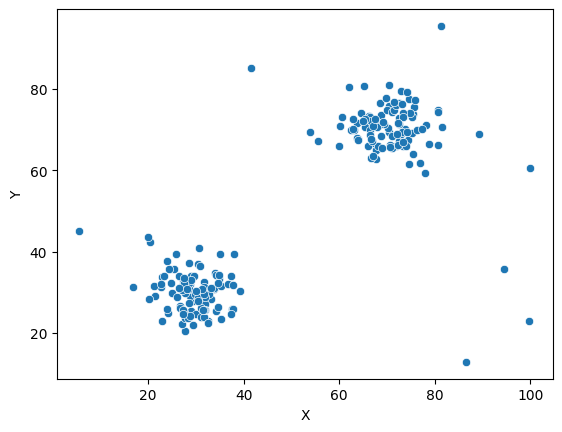

In [31]:
#es 3

from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df1 = pd.read_excel(r'c:\Users\Andrea C\Desktop\its\Py\datascience\roba_es_preprocess\dataset_clustering_outlier_esercizio.xlsx')

df1.head()
df1.describe()

sns.scatterplot(data=df1,x='X',y='Y')

X = df1[['X','Y']].values

kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels_km = kmeans.labels_

distances_km = np.linalg.norm(X - centroids[labels_km],axis=1)

threshold_km = np.percentile(distances_km,95)
outliers_km = distances_km > threshold_km


distances = kmeans.transform(X).min(axis=1)

print("Numero di Outliers (K-mean) : ",outliers_km.sum())
print("Distanze : ",distances)
print(f"\n{np.where(outliers_km)[0]}")

In [ ]:
#es 3 DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=7,min_samples=5)

labels_db = dbscan.fit_predict(X)

outliers_db = (labels_db == -1)

print("Numero di outlier : ",outliers_db.sum())
print("indici outlier : ",np.where(outliers_db)[0].tolist())

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [51]:
#es 4
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

df2 = pd.read_excel(r'c:\Users\Andrea C\Desktop\its\Py\datascience\roba_es_preprocess\dataset_sbilanciato_esercizio.xlsx')

print(df2.head())

x = df2.drop('Target',axis=1)
y = df2['Target']

print(df2['Target'].value_counts())

rus = RandomUnderSampler(random_state=42)

x_rus , y_rus = rus.fit_resample(x,y)


   Feature_1  Feature_2  Target
0   5.993428   4.517528       0
1   4.723471   5.704111       0
2   6.295377   2.496921       0
3   8.046060   7.887529       0
4   4.531693   4.835698       0
Target
0    950
1     50
Name: count, dtype: int64
